In [132]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [133]:
df  = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


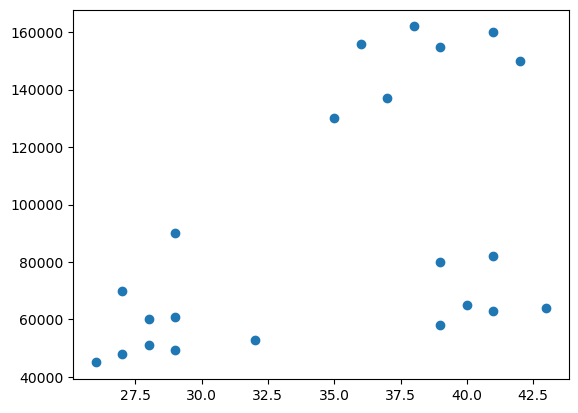

In [134]:
plt.scatter(df['Age'],df['Income($)'])

In [135]:
from sklearn.cluster import KMeans

In [136]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [137]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [138]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


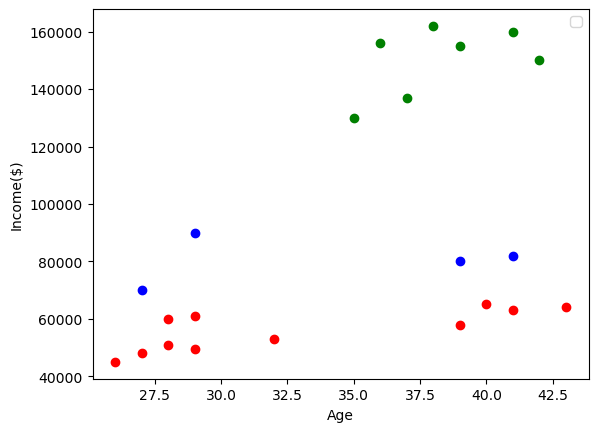

In [139]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['Age'],df0['Income($)'],color = 'red')
plt.scatter(df1['Age'],df1['Income($)'],color = 'green')
plt.scatter(df2['Age'],df2['Income($)'],color = 'blue')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# If we observe green not well clustered because of x and y axis numbers limit perform Scaling 

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
scaler = MinMaxScaler()
# Fit the scaler on the 'Age' column, ensuring it's 2D
scaler.fit(df[['Age']])

# Transform the 'Age' column and reshape the result back to the original shape
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [142]:
# perform Kmeans again
km1 = KMeans(n_clusters=3)
km1

KMeans(n_clusters=3)

In [143]:
y_pred1 = km1.fit_predict(df[['Age','Income($)']])
y_pred1

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [144]:
df['cluster'] = y_pred1
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [145]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

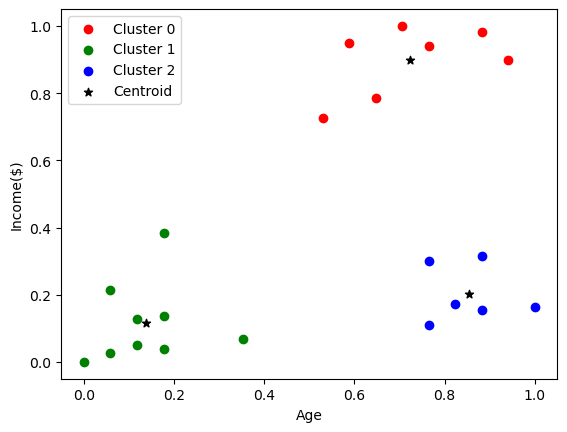

In [146]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0['Age'], df0['Income($)'], color='red', label='Cluster 0')
plt.scatter(df1['Age'], df1['Income($)'], color='green', label='Cluster 1')
plt.scatter(df2['Age'], df2['Income($)'], color='blue', label='Cluster 2')
plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1], color = "black", marker = "*", label = "Centroid")

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()  # This will now show the labels for each cluster

plt.show()


### How to determine k value ?
#### By elbow graph 

In [147]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km1 = KMeans(n_clusters=k,n_init=10)
    km1.fit(df[['Age','Income($)']])
    sse.append(km1.inertia_)


In [148]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.22020960864009398,
 0.1685851223602976,
 0.13265419827245162,
 0.10383752586603562]

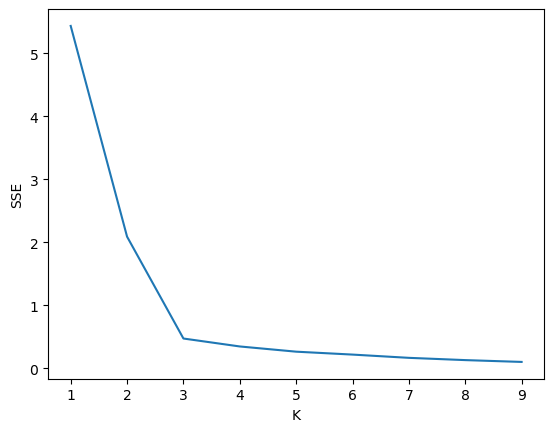

In [149]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

In [150]:
#Excerise 

In [151]:
from sklearn.datasets import load_iris

In [152]:
iris = load_iris()

In [153]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [155]:
iris_df =  pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [156]:
iris_df['target'] =  iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


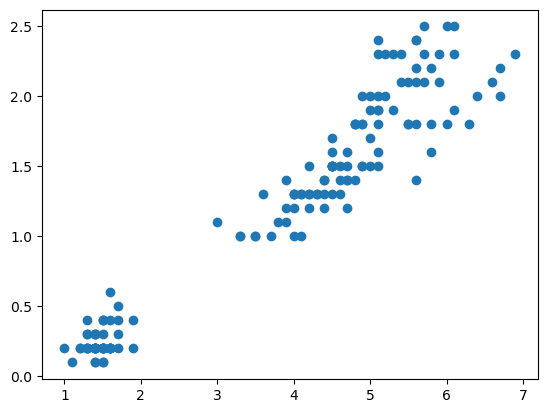

In [158]:
plt.scatter(iris_df['petal length (cm)'],iris_df['petal width (cm)'])

In [159]:
km2= KMeans(n_clusters=3)
km2

KMeans(n_clusters=3)

In [161]:
y_pred2 = km2.fit_predict(iris_df[['petal length (cm)','petal width (cm)']])
y_pred2

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [163]:
iris_df['clusters'] =  y_pred2
iris_df 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,clusters
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


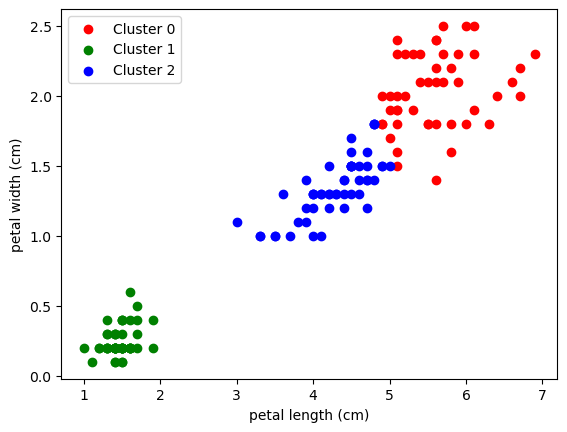

In [165]:
iris_df0 = iris_df[iris_df.clusters == 0]
iris_df1 = iris_df[iris_df.clusters == 1]
iris_df2 = iris_df[iris_df.clusters == 2]

plt.scatter(iris_df0['petal length (cm)'], iris_df0['petal width (cm)'], color='red', label='Cluster 0')
plt.scatter(iris_df1['petal length (cm)'], iris_df1['petal width (cm)'], color='green', label='Cluster 1')
plt.scatter(iris_df2['petal length (cm)'], iris_df2['petal width (cm)'], color='blue', label='Cluster 2')


plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()  # This will now show the labels for each cluster

plt.show()

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km2 = KMeans(n_clusters=k,n_init=10)
    km2.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km2.inertia_)

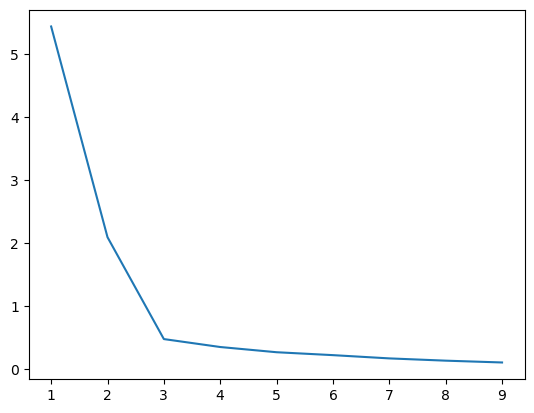

In [166]:
plt.plot(k_rng,sse)